<a href="https://colab.research.google.com/github/YasaswiniReddy07/YasaswiniReddy07/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  WORLDWIDE DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
print(df['Country/Region'].nunique())
print(df['WHO Region'].unique())

187
['Eastern Mediterranean' 'Europe' 'Africa' 'Americas' 'Western Pacific'
 'South-East Asia']


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


In [ ]:
df = df.rename(columns = {'Country/Region':'Country'})
df.columns

Index(['Province/State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
WHOr = df.groupby('WHO Region')['Confirmed'].sum().sort_values()
WHOr

WHO Region
Africa                    21791827
Western Pacific           26374411
South-East Asia           55118365
Eastern Mediterranean     74082892
Europe                   248879793
Americas                 402261194
Name: Confirmed, dtype: int64

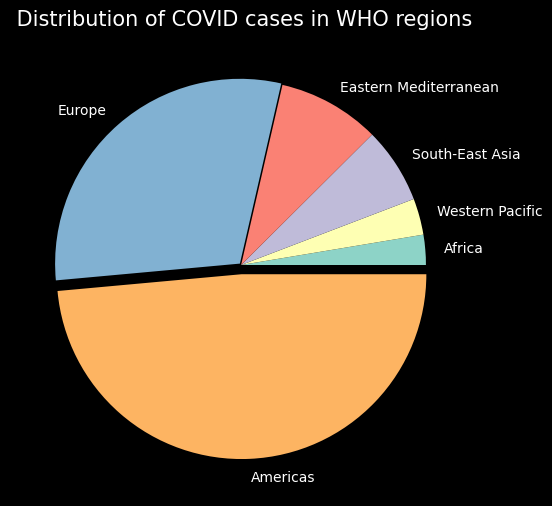

In [ ]:
WHOr = df.groupby('WHO Region')['Confirmed'].sum().sort_values()
explode = [0,0,0,0,0.01,0.05]
plt.figure(figsize = (10,6))
plt.pie(WHOr.values,explode = explode,labels = WHOr.index)
plt.title(' Distribution of COVID cases in WHO regions',fontsize = 15)
plt.show()

In [ ]:
grouped_data_dates = df.groupby('Date').agg({'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum',
                                               'Active':'sum'}).reset_index()
grouped_data_dates.tail()

,Date,Confirmed,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


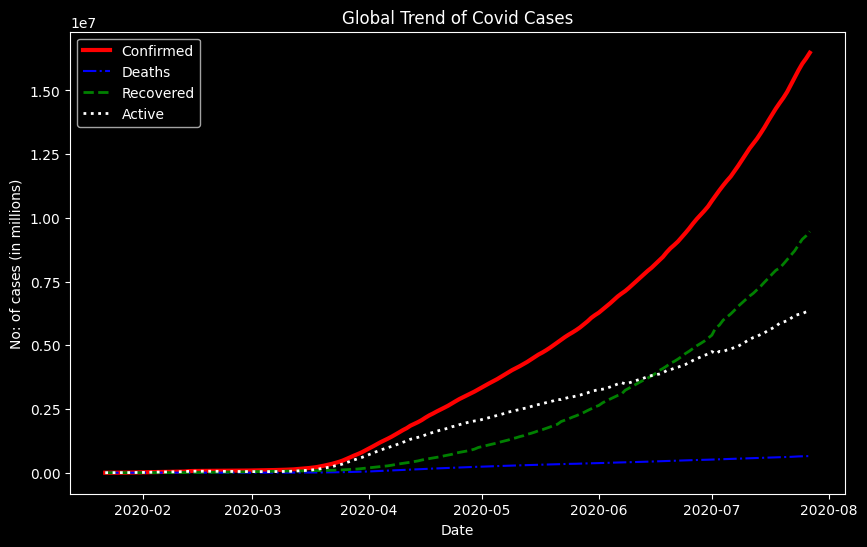

In [ ]:
plt.figure(figsize = (10,6))
# Plotting Confirmed cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Confirmed'],linestyle = '-',color = 'r',label = 'Confirmed',lw = 3)
# Plotting Deaths
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Deaths'],linestyle = '-.',color = 'b',label = 'Deaths')
# Plotting Recovered cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Recovered'],linestyle = '--',color = 'g',label = 'Recovered',lw = 2)
# Plotting active cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Active'],linestyle = ':',color = 'w',label = 'Active',lw = 2)
plt.xlabel('Date')
plt.ylabel('No: of cases (in millions)')
plt.title('Global Trend of Covid Cases')
plt.legend()
plt.show()


In [ ]:
#group data by country
country_grouped = df.groupby('Country').max()
country_grouped.sample(10)

<ipython-input-48-e4e71c7a48e7>:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Country,,,,,,,,
Oman,21.512583,55.923255,2020-07-27,77058,393,57028,23276,Eastern Mediterranean
Nicaragua,12.865416,-85.207229,2020-07-27,3439,108,2492,1198,Americas
Mozambique,-18.665695,35.529562,2020-07-27,1701,11,0,1690,Africa
Slovenia,46.151200,14.995500,2020-07-27,2087,116,1733,1109,Europe
Jamaica,18.109600,-77.297500,2020-07-27,853,10,714,424,Americas
Bhutan,27.514200,90.433600,2020-07-27,99,0,86,48,South-East Asia
United Arab Emirates,23.424076,53.847818,2020-07-27,59177,345,52510,17173,Eastern Mediterranean
Congo (Kinshasa),-4.038300,21.758700,2020-07-27,8844,208,5700,5722,Africa
Azerbaijan,40.143100,47.576900,2020-07-27,30446,423,23242,8651,Europe


<ipython-input-53-4c6105374b57>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




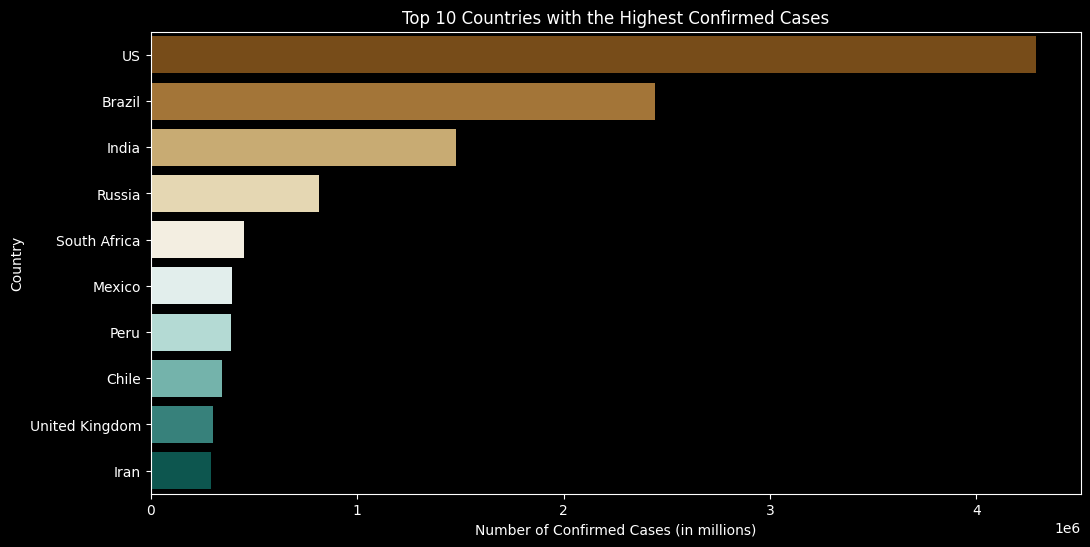

In [ ]:
top10_confirmed = country_grouped.nlargest(10,'Confirmed')

#bar chart for confirmed cases
plt.figure(figsize = (12,6))
sns.barplot(x = top10_confirmed['Confirmed'].sort_values(ascending = False),y = top10_confirmed.index,palette = 'BrBG')
plt.title('Top 10 Countries with the Highest Confirmed Cases')
plt.xlabel('Number of Confirmed Cases (in millions)')
plt.ylabel('Country')
plt.show()

<ipython-input-54-add5623de835>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




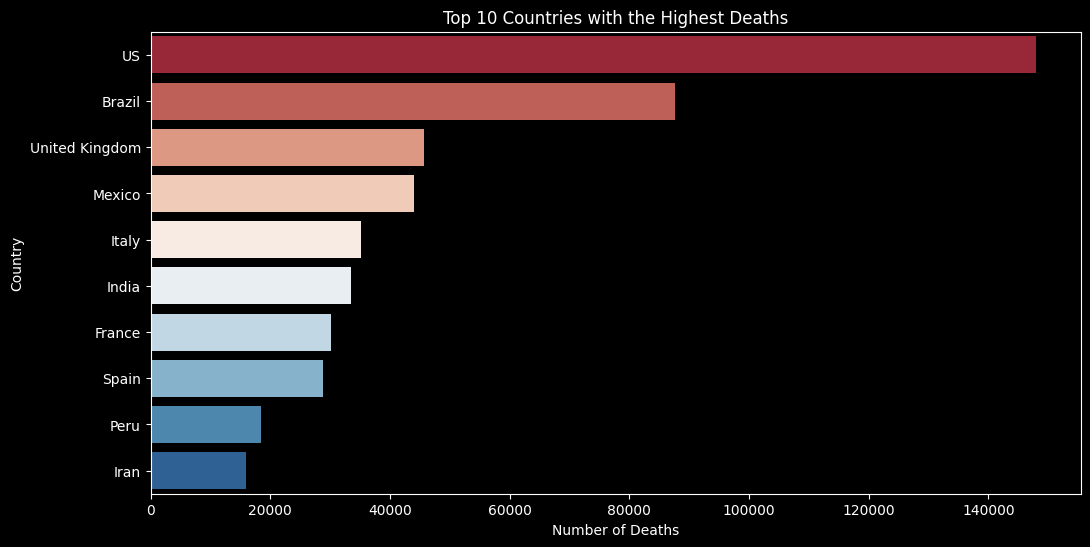

In [ ]:
top10_deaths = country_grouped.nlargest(10,'Deaths')

#bar chart for covid deaths
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_deaths['Deaths'].sort_values(ascending = False),y = top10_deaths.index,palette = 'RdBu')
plt.title('Top 10 Countries with the Highest Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Country')
plt.show()

<ipython-input-55-b3b0e2836b38>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




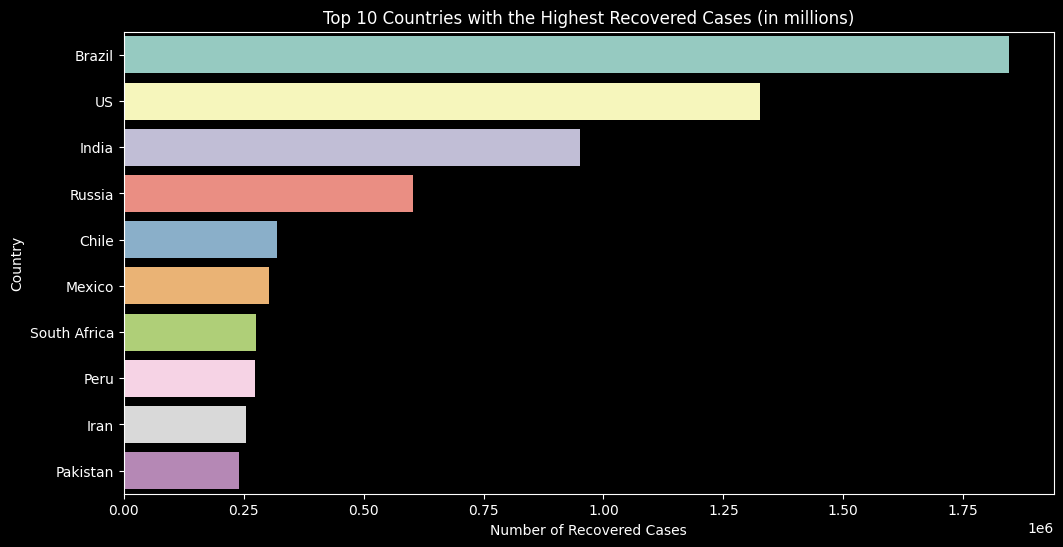

In [ ]:
top10_recovered = country_grouped.nlargest(10,'Recovered')

#bar chart for recovered cases
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_recovered['Recovered'].sort_values(ascending = False),y = top10_recovered.index,palette = 'Set3')
plt.title('Top 10 Countries with the Highest Recovered Cases (in millions)')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('Country')
plt.show()

In [ ]:
#calculate correlation matrix
correlation_matrix = df[['Confirmed','Deaths','Recovered']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.912361,0.895506
Deaths,0.912361,1.000000,0.763090
Recovered,0.895506,0.763090,1.000000


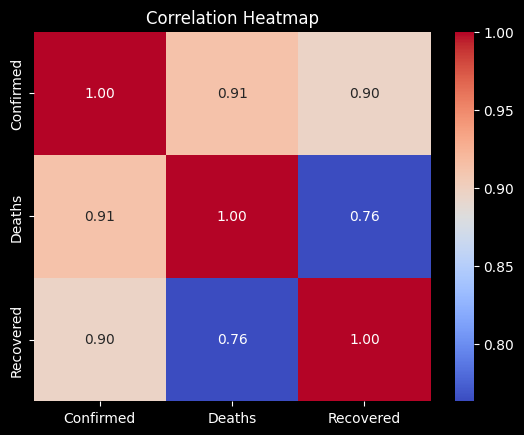

In [ ]:
#plot correlation map
plt.style.use('dark_background')
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

INDIA WIDE ANALYSIS

In [ ]:
df = pd.read_csv('/content/complete.csv')
df.head()

,Date,Name of State / UT,Latitude,Longitude,Confirmed,Deaths,Recovered,New cases,New deaths,New recovered
0,30-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,31-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,01-02-2020,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,02-02-2020,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,03-02-2020,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [ ]:
df["Deaths"] = pd.to_numeric(df["Deaths"], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4692 non-null   object 
 1   Name of State / UT  4692 non-null   object 
 2   Latitude            4692 non-null   float64
 3   Longitude           4692 non-null   float64
 4   Confirmed           4692 non-null   int64  
 5   Deaths              4691 non-null   float64
 6   Recovered           4692 non-null   int64  
 7   New cases           4692 non-null   int64  
 8   New deaths          4692 non-null   int64  
 9   New recovered       4692 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 366.7+ KB


In [ ]:
df.describe()

,Latitude,Longitude,Confirmed,Deaths,Recovered,New cases,New deaths,New recovered
count,4692.000000,4692.000000,4692.000000,4691.000000,4692.000000,4692.000000,4692.0,4692.000000
mean,23.185327,81.451837,11393.925192,291.280750,6908.130648,418.643009,0.0,283.069054
std,6.635913,6.959475,37208.600846,1213.817206,23390.671258,1259.748923,0.0,947.925811
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,18.112400,76.271100,39.000000,0.000000,9.000000,1.000000,0.0,0.000000
50%,23.940800,79.019300,619.000000,5.000000,197.500000,26.000000,0.0,8.000000
75%,28.218000,85.313100,5233.000000,68.500000,2736.000000,210.250000,0.0,119.000000
max,34.299600,94.727800,468265.000000,16476.000000,305521.000000,18366.000000,0.0,13401.000000


In [ ]:
df.isna().sum()

Date                  0
Name of State / UT    0
Latitude              0
Longitude             0
Confirmed             0
Deaths                1
Recovered             0
New cases             0
New deaths            0
New recovered         0
dtype: int64

In [ ]:
print(df['Name of State / UT'].nunique())

40


In [ ]:
df.isnull().sum()

Date                  0
Name of State / UT    0
Latitude              0
Longitude             0
Confirmed             0
Deaths                1
Recovered             0
New cases             0
New deaths            0
New recovered         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


<ipython-input-101-fcfaa3a4b6ff>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df = df.rename(columns = {'Name of State / UT':'State/UT'})
df.columns

Index(['Date', 'State/UT', 'Latitude', 'Longitude', 'Confirmed', 'Deaths',
       'Recovered', 'New cases', 'New deaths', 'New recovered'],
      dtype='object')

In [ ]:
grouped_data_dates = df.groupby('Date').agg({'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum'}).reset_index()
grouped_data_dates.tail()

,Date,Confirmed,Deaths,Recovered
181,2020-12-03,74,1.0,3
182,2020-12-04,8356,273.0,716
183,2020-12-05,70756,2293.0,22455
184,2020-12-06,289220,8498.0,147195
185,2020-12-07,846529,22674.0,534621


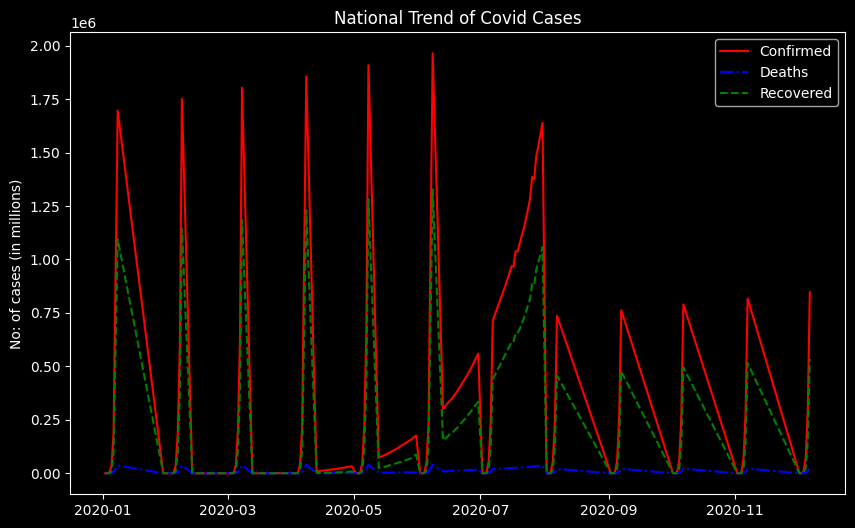

In [ ]:
plt.figure(figsize = (10, 6))
# Plotting Confirmed cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Confirmed'],linestyle = '-',color = 'r',label = 'Confirmed')
# Plotting Deaths
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Deaths'],linestyle = '-.',color = 'b',label = 'Deaths')
# Plotting Recovered cases
plt.plot(grouped_data_dates['Date'],grouped_data_dates['Recovered'],linestyle = '--',color = 'g',label = 'Recovered')

plt.ylabel('No: of cases (in millions)')
plt.title('National Trend of Covid Cases')
plt.legend()
plt.show()

In [ ]:
#group data by state
state_grouped = df.groupby('State/UT').max()
state_grouped.sample(10)

,Date,Latitude,Longitude,Confirmed,Deaths,Recovered,New cases,New deaths,New recovered
State/UT,,,,,,,,,
Telangana,2020-12-07,18.1124,79.0193,73050,589.0,52103,3742,0,3244
Chandigarh,2020-12-07,30.7333,76.7794,1270,20.0,715,64,0,82
Manipur,2020-12-07,24.6637,93.9063,3093,7.0,1862,141,0,174
Union Territory of Chandigarh,2020-03-20,30.7333,76.7794,1,0.0,0,0,0,0
Jammu and Kashmir,2020-12-07,33.7782,76.5762,22955,426.0,15244,1091,0,905
Madhya Pradesh,2020-12-07,22.9734,78.6569,35734,929.0,26064,1438,0,1315
Andaman and Nicobar Islands,2020-12-07,11.7401,92.6586,1027,14.0,326,99,0,49
Haryana,2020-12-07,29.0588,76.0856,38548,455.0,31960,1491,0,1238
Punjab,2020-12-07,31.1471,75.3412,19856,491.0,12943,944,0,952


<ipython-input-107-5ecb27443869>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




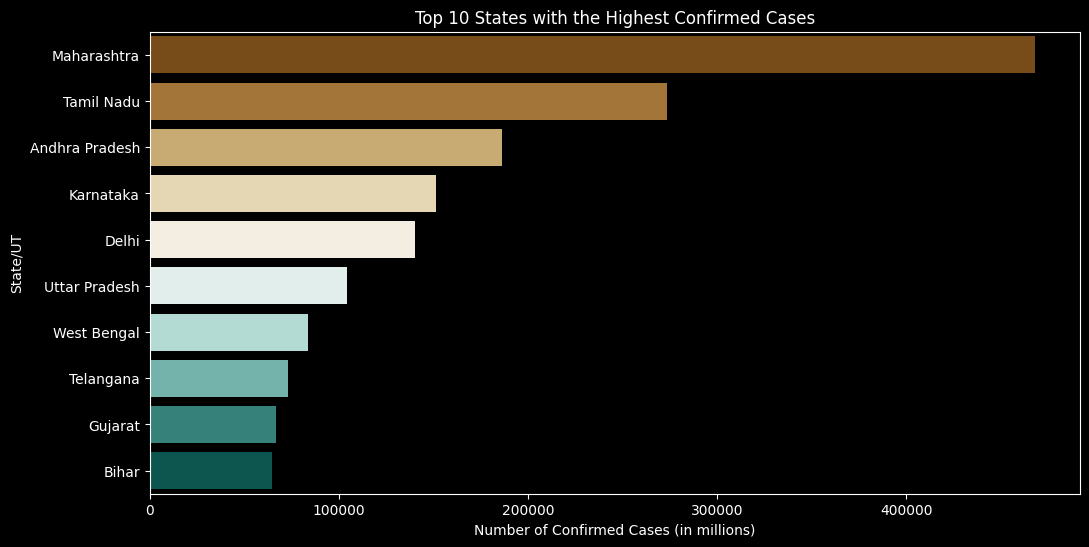

In [ ]:
top10_confirmed = state_grouped.nlargest(10,'Confirmed')

#bar chart for confirmed cases
plt.figure(figsize = (12,6))
sns.barplot(x = top10_confirmed['Confirmed'].sort_values(ascending = False),y = top10_confirmed.index,palette = 'BrBG')
plt.title('Top 10 States with the Highest Confirmed Cases')
plt.xlabel('Number of Confirmed Cases (in millions)')
plt.ylabel('State/UT')
plt.show()

<ipython-input-108-4955f397e381>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




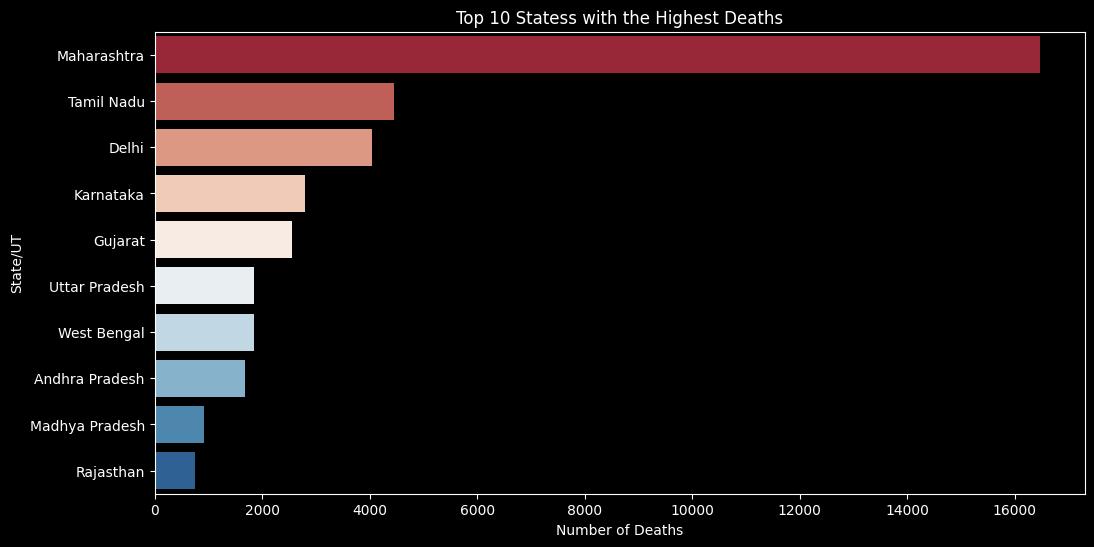

In [ ]:
top10_deaths = state_grouped.nlargest(10,'Deaths')

#bar chart for covid deaths
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_deaths['Deaths'].sort_values(ascending = False),y = top10_deaths.index,palette = 'RdBu')
plt.title('Top 10 Statess with the Highest Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('State/UT')
plt.show()

<ipython-input-109-c6cf5e129fb1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




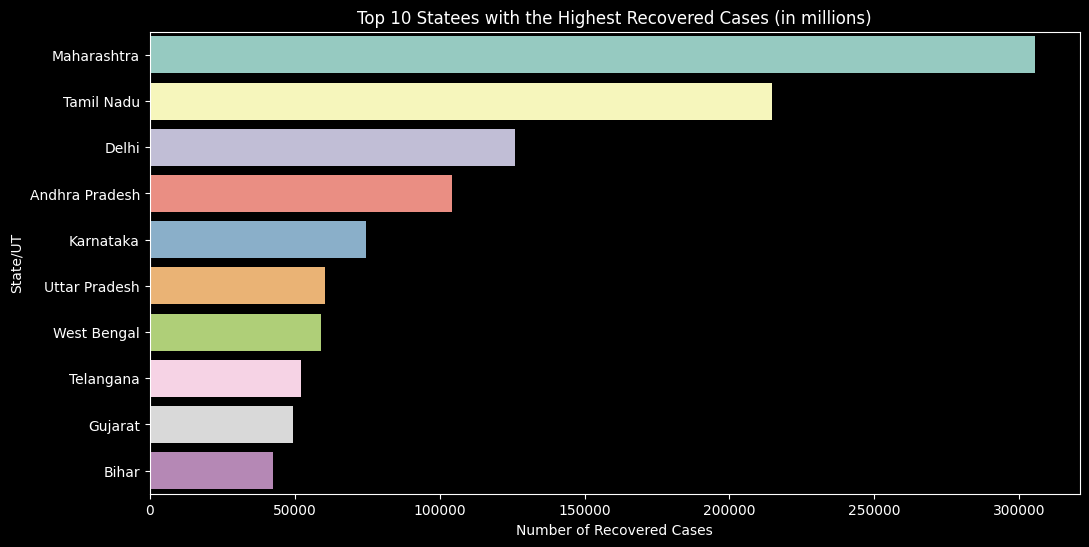

In [ ]:
top10_recovered = state_grouped.nlargest(10,'Recovered')

#bar chart for recovered cases
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_recovered['Recovered'].sort_values(ascending = False),y = top10_recovered.index,palette = 'Set3')
plt.title('Top 10 Statees with the Highest Recovered Cases (in millions)')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('State/UT')
plt.show()

In [ ]:
#calculate correlation matrix
correlation_matrix = df[['Confirmed','Deaths','Recovered']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.934948,0.983722
Deaths,0.934948,1.000000,0.900811
Recovered,0.983722,0.900811,1.000000


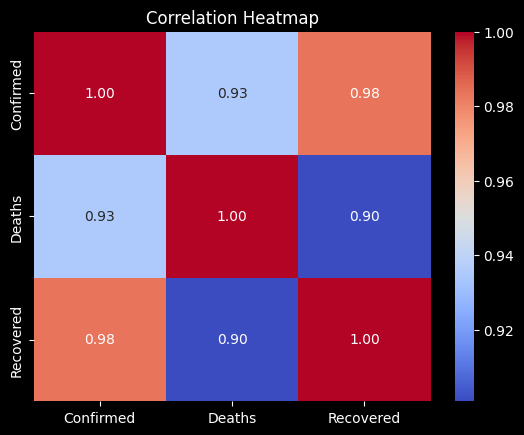

In [ ]:
#plot correlation map
plt.style.use('dark_background')
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()